# Funktionen

Um zu vermeiden in einem Programm die selben Befehle häufig zu wiederholen, können wir Funktionen definieren, welche uns diese arbeit abnehmen. Dazu müssen wir zum einen den Funktionskopf, welcher den Namen der Funktion und zu übergebende Parameter beinhaltet, den Funktions Körper, welcher die Befehle der Funktions beinhaltet, und einen Optionalen Rückgabewert definieren.

~~~python
def func_name(param_1, param_2, param_3...):
    do_stuff
    return value
~~~

Wenn eine Funktion aufgerufen wird, welche einen Rückgabewert hat, so wird ihr Rückgabe wert an der Aufgerufenen stelle eingesetzt. Nach dem der `return`-Befehl in einem erreicht wird, werden alle folgenden Befehle nicht mehr ausgeführt.

In [5]:
def print_list(l):
    for val in l:
        print(val, end=", ")

fib = [1, 1, 2, 3, 5, 8, 13, 21, 34]
print_list(fib)

1, 1, 2, 3, 5, 8, 13, 21, 34, 

In [6]:
def f(x):
    return x**2 + 3*x + 2

print(f(5))

42


In [10]:
def print_stuff():
    print("some")
    return
    print("stuff") # Diese Zeile wird nicht mehr ausgeführt

print_stuff()

some


False

Veränderungen an Objekten, welche *mutable* sind, sind auch außerhalb der Funktion gültig.

In [11]:
def correct(l):
    l[0] = "Romanus"
    l[1] = "ite"
    l[2] = "Domum"

liste = ["Romanes", "Eunt", "Domus"]
correct(liste)
print_list(liste)

Romanus, ite, Domum, 

Es ist auch möglich einer Funktion eine andere Funktion zu über geben. Ein Beispiel dafür liefert der Differentenquotient. Die Ableitung einer Funktion ist folgendermaßen definiert:

$$f'(x) := \lim_{h \to 0}\frac{f(x+h)-f(x)}{h}$$

Diese Gleichung nennen wir auch Differentenquotient. Wenn wir eine Ableitungsfunktion programmieren wollen ist uns oft nicht möglich die Ableitung einer Funktion durch Algebra und Umformungen zu ermitteln. Deshalb verwendet man meistens den Differentenquotienten mit einem sehr kleinen $h$, sodass es nahe an Null liegt. In unserem Beispiel wollen wir eine Funktion `derivative` definieren, welche eine Funktion und einen Wert als Parameter annimmt und die Aproximation der Ableitung an diesem Punkt zurückgibt.

In [12]:
def f(x):
    return x**3 - x**2 + 2*x - 12

def derivative(f, x):
    h = 1e-10
    return (f(x+h) - f(x))/h

print(derivative(f, 4))

42.00003900223237


## Rekurrsion

Manchmal ist es sinnvoll in der Definition einer Funktion diese sich selbst aufrufen zu lassen. Ein Beispiel dafür ist die Fibonaccireihe. Die ersten beiden elemente werden definiert als $F_{0} = 1$ und $F_{1} = 1$. Alle folgenden Elemente werden definiert als $F_{n} = F_{n-1}+F_{n-2}$. Die nächste Zahl ist also immer die Summe ihrer beiden Vorgänger. Daraus entsteht die Reihe $$1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144...$$

In [13]:
def fib_rec(n): # Gibt die n-te Fibonaccizahl zurück
    if n < 2:
        return 1 # Abbruchbedingung
    else:
        return fib_rec(n-1) + fib_rec(n-2)

for i in range(12):
    print(fib_rec(i), end=", ")

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 

Eine rekursive Funktion benötigt eine Abbruchbedingung andern falls wird sie nach einem Aufruf niemals terminieren.

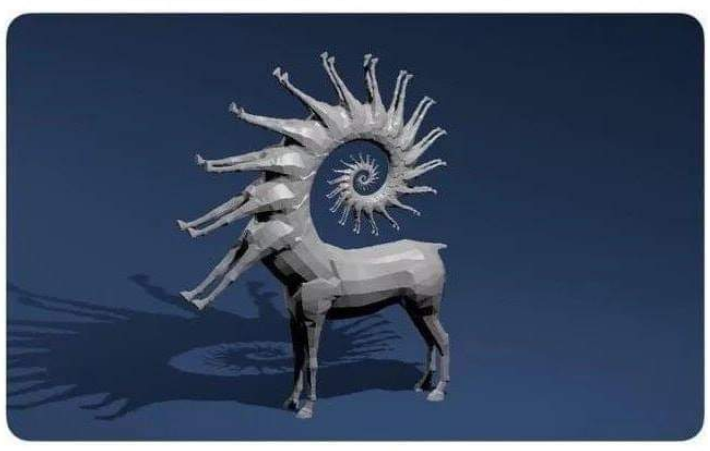

### Rekursion vs Iteration

Für die meisten rekursiven Funktionen gibt es auch eine iterative Variante. Im Gegensatz zu einer rekursiven Funktion löst eine iterative Funktion ein Problem durch Wiederholung, anstatt durch neue Funktionsaufrufe. Ein Beispiel liefert uns die Fakultätsfunktion $x! = 1\cdot2\cdot3...\cdot x$, oder allgemeiner:

$$
n! = \begin{cases} 1 & n = 0 \\ n \cdot (n - 1)! & \text{sonst} \end{cases}
$$

In [14]:
def fac_iter(n):
    fac = 1
    while n > 1:
        fac *= n
        n -= 1

def fac_rec(n):
    if n == 1:
        return 1
    else:
        return n*fac_rec(n-1)

Mithilfe der `%timeit` funktionalität können wir die durchschnittliche Laufzeit einer Funktion testen. `%timeit` ist ein spezielles Feature von IPython und ist außerhalb von jupyter meist nicht verwendbar.

In [15]:
%timeit fac_iter(24)
%timeit fac_rec(24)

2.9 µs ± 283 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.95 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Hier lässt sich für uns bereits erkennen, dass ein rekursiver Funktionsaufruf etwas mehr Zeit beansprucht. Generell sind die Laufzeiten in diesem Beispiel jedoch nicht al zu weit auseinander. Schauen wir nun wie es sich bei der Fibonaccifolge verhält.

In [16]:
def fib_iter(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return b

%timeit fib_iter(24)
%timeit fib_rec(24)

1.72 µs ± 60.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
19 ms ± 626 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Da in der rekursiven Fibonaccifolge pro Aufruf zwei weitere Aufrufe gemacht werden steig die Laufzeit abhängig von $n$ exponentiell; Beim iterativen Aufruf hingegen ist sie bloß linear.

# Generatoren

~~~python
def name(params...):
    do_stuff
    yield stuff
    do_other_stuff
    yield other_stuff
    ...
~~~

Neben den Bultingeneratoren wie `zip, enumerate, range` können wir auch unsere eigenen Generatoren schreiben. Der Aufbau ist sehr ähnlich zu dem einer Funktion. Der Unterschied besteht darin, dass wir einen Funktionswert nicht mit `return` sondern mit `yield` zurückgeben. Anders als bei einem `return` wird der Generator danach nicht abgebrochen, sondern nur pausiert. Beim nächsten aufruf des Generators wird an der pausierten Stelle fortgefahren. Dieswird solange wiederholt, bis das Ende des Generators erreicht wurde.

In [18]:
def generate_ABC():
    yield "A"
    yield "B"
    yield "C"

for letter in generate_ABC():
    print(letter)

A
B
C


In [19]:
def squares(n): # Gibt die ersten n Quadratzahlen zurück
    for i in range(n):
        yield i**2

for x in squares(5):
    print(x, end=", ")

0, 1, 4, 9, 16, 

## Parameter

Es gibt einige Modifikation die man an den Parametern die im Kopf einer Definition notiert werden machen kann. Möchte man Beispielsweise einen Standartwert festlegen, welcher nicht zwangsweise beim Aufruf der Funktion oder des Generators übergeben werden muss, kann man dies wie folgt tun.

~~~python
def name(param_1, param_2... param_n=value):
    do_stuff
~~~

Diese Parameter nennt man *default parameter*. Default Parameter dürfen nicht vor anderen Parametern in deiner Funktionsdefinition stehen.

Bei manchen Funktionen möchte man sich nicht im Vorfeld darauf festlegen, wie viele Parameter man über gibt. Dies lässt sich damit realisieren, dass man vor einen Parameternamen ein `*` schreibt. In der Funktion wird der Parameter als Liste interpretiert, beim Aufruf der Funktion können für diesen einen Parameter jedoch mehrere Werte übergeben werden.

~~~python
def name(*args):
    do_stuff
~~~

Die Konvention ist es `args` als Namen zu verwenden, es ist jedoch möglich beliebige andere Namen zu wählen.

In [20]:
def my_range(start, stop, step=1):
    n = start
    while n < stop:
        yield n
        n += step

for i in my_range(8, 12):
    print(i, end=", ")

8, 9, 10, 11, 

In [25]:
def my_print(*args):
    for obj in args:
        print(obj, end=" ")
my_print("ha", "haa", "HA", "TSCHI")

ha haa HA TSCHI 

Im letzten Beispiel wurde der Python Printfunktion ein sog. `keyword argument` übergeben (`end = ""`). Ähnlich zu `*args` gibt es auch für Keyword Arguments die Möglichkeit eine beliebige Menge von ihnen im Kopf einer Funktion anzugeben. Diese werden in der Funktion als `dict` interpretiert.

~~~python
def name(**kwargs):
    do_stuff
~~~

Auch hier ist die Benennung `kwargs` lediglich eine Konvention.

In [24]:
def make_dict(**kwargs):
    dictionary = {}
    for key, value in kwargs.items():
        dictionary[key] = value
    return dictionary

d = make_dict(Name="Sir Lancelot", Quest="Find the Holy Grail", favorite_colour="Blue")
print(d)

{'Name': 'Sir Lancelot', 'Quest': 'Find the Holy Grail', 'favorite_colour': 'Blue'}
{'Name': 'Sir Lancelot', 'Quest': 'Find the Holy Grail', 'favorite_colour': 'Blue'}


Die Reihnfolge in welcher diese Parameter angegeben sein sollten sieht wie folgt aus:

~~~python
def name(x0, x1... default_0=v0, default_1=v1... *args, **kwargs):
~~~


## Anonyme Funktionen

Häufig möchte man einer Funktion eine andere übergeben die eine kleine Rechnung ausführt, würde aber gerne vermeiden wollen, dafür eine vollständige Definition auszusetzten. `lambda` gibt uns die Möglichkeit eine einfache Funktion *'on the fly'* zu definieren.

~~~python
lambda parm_0, parm_1: ausdruck
~~~

In [26]:
derivative(lambda x: x**2, 21)

41.99932845949661

In [27]:
func = lambda x, y: x**y - y**x
func(3, 2)

1

# Comprehesions

Ein häufiges Muster, das beim Programmieren auftritt, ist das Erstellen einer Liste mit speziefischen Elementen.

In [28]:
even_squares = []
for x in range(10):
    if x % 2 == 0: # True if x is even
        even_squares.append(x**2)
print(even_squares)

[0, 4, 16, 36, 64]


Die mathematische Definition dieser Menge wäre $\{n^{2}:n\in\mathbb{N}^{10}, n\ ist\ gerade\}$. In Python gibt es die Möglichkeit Listen und Generatoren analog zu definieren.

~~~python
liste = [x**2 for x in range(10) if x % 2 == 0]
generator = (x**2 for x in range(10) if x % 2 == 0)
~~~

Eine Bedingung ist hierbei optional.

In [32]:
[char.upper() for char in "abcdefg"]

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [33]:
gen = (x**2 for x in range(10) if x % 2 == 0)
print(type(gen))
for square in gen:
    print(square, end=", ")

<class 'generator'>
0, 4, 16, 36, 64, 

In [34]:
[1/x for x in range(1, 8)]

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285]

Das Selbe ist auch für Dictionaries möglich.

In [35]:
{x: x**2 for x in range(1, 8)}

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49}